In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Loading preprocessed data

file_path = '../../data/processed/merged_full_features_dataset.csv'
df_features = pd.read_csv(file_path)
df_features

,Year,Country,Latitude,Longitude,CO2EmissionRate,CO2_Emissions_log,Population,Population_density
0,1990,Afghanistan,33.939110,67.709953,0.2,-0.698970,12412308,19
1,1990,Albania,41.153332,20.168331,2.3,0.361728,3286542,119
2,1990,Algeria,28.033886,1.659626,3.0,0.477121,25758869,10
3,1990,Angola,-11.202692,17.873887,0.4,-0.397940,11848386,9
4,1990,Antigua and Barbuda,17.060816,-61.796428,4.9,0.690196,62528,142
...,...,...,...,...,...,...,...,...
4421,2015,Venezuela,6.423750,-66.589730,5.1,0.707570,30081829,34
4422,2015,Vietnam,14.058324,108.277199,2.2,0.342423,92677076,298
4423,2015,Yemen,15.552727,48.516388,0.5,-0.301030,26497889,50
4424,2015,Zambia,-13.133897,27.849332,0.3,-0.522879,15879361,21


In [13]:
selected_columns = ['Latitude', 'Longitude', 'Population', 'Population_density', 'CO2_Emissions_log']

df_features = df_features[selected_columns]
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4426 entries, 0 to 4425
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitude            4426 non-null   float64
 1   Longitude           4426 non-null   float64
 2   Population          4426 non-null   int64  
 3   Population_density  4426 non-null   int64  
 4   CO2_Emissions_log   4426 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 173.0 KB


In [14]:
corr_matrix = df_features.corr(numeric_only=True)
corr_matrix

,Latitude,Longitude,Population,Population_density,CO2_Emissions_log
Latitude,1.000000,0.036436,0.052231,0.017009,0.429734
Longitude,0.036436,1.000000,0.142621,0.164904,-0.014421
Population,0.052231,0.142621,1.000000,-0.021752,0.007785
Population_density,0.017009,0.164904,-0.021752,1.000000,0.082088
CO2_Emissions_log,0.429734,-0.014421,0.007785,0.082088,1.000000


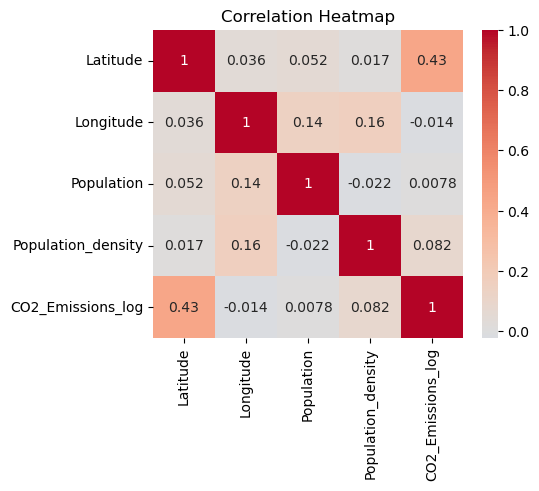

In [21]:
plt.figure(figsize=(5, 4))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
plt.savefig('../../data/processed/heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Modeling.  

Based on the correlation heatmap, we can select 'Latitude' and 'Population_density' as principal features.

To establish a baseline model, we try a simple Linear Regression:

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Splitting the data into train and test portions, 80:20 split:

# Step 1: Define the target variable (y) and predictor variables (X)
y = df_features['CO2_Emissions_log']
X = df_features[['Latitude', 'Population_density']]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Linear Regression:

# Step 3: Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# You can also examine the coefficients and intercept of the model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Mean Squared Error (MSE): 0.36
R-squared (R2): 0.20
Coefficients: [1.17983474e-02 3.16092400e-05]
Intercept: 0.07716719170104303


Based on the results above it does not seem to be a Linear Regression problem.  

So we would establish a baseline using Decision Tree:

In [26]:
from sklearn.tree import DecisionTreeRegressor
import pickle

In [46]:
# Decision Tree:

# Step 3: Create a Decision Tree Regression model
tree_model = DecisionTreeRegressor(random_state=42)

# Step 4: Fit the Decision Tree model to the training data
tree_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

# Step 6: Evaluate the Decision Tree model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared for both training and testing data
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred)

print("Decision Tree Regression:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2) - Training: {train_r2:.3f}")
print(f"R-squared (R2) - Testing: {test_r2:.3f}")

# Step 7: Save the model using pickle
model_filename = "../../output/decision_tree_regression_model_all.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(tree_model, model_file)
print(f"Model saved as {model_filename}")


Decision Tree Regression:
Mean Squared Error (MSE): 0.012
Root Mean Squared Error (RMSE): 0.111
Mean Absolute Error (MAE): 0.047
R-squared (R2) - Training: 0.997
R-squared (R2) - Testing: 0.972
Model saved as ../../output/decision_tree_regression_model_all.pkl


This is a much improved model result.  

So we can compare with Random Forest:

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
# Random Forest:

# Step 3: Create a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Step 4: Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Step 6: Evaluate the Random Forest model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2): {r2:.3f}")

# Step 7: Save the model using pickle
model_filename = "../../output/random_forest_regression_model_all.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(rf_model, model_file)
print(f"Model saved as {model_filename}")


Random Forest Regression:
Mean Squared Error (MSE): 0.009
Root Mean Squared Error (RMSE): 0.094
Mean Absolute Error (MAE): 0.049
R-squared (R2): 0.980
Model saved as ../../output/random_forest_regression_model_all.pkl


Little improvement in R-squared score and slight reduction in Mean Squared Error with Random Forest ensemble technique.  

So we compare with gradient boosting technique using XGBoost:

In [40]:

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# XGBoost Regression:

# Step 3: Create an XGBoost Regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 4: Fit the XGBoost model to the training data
xgb_model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Step 6: Evaluate the XGBoost model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regression:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2): {r2:.3f}")

# Step 7: Save the model using pickle
model_filename = "../../output/xgboost_regression_model.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(xgb_model, model_file)
print(f"Model saved as {model_filename}")


XGBoost Regression:
Mean Squared Error (MSE): 0.009
Root Mean Squared Error (RMSE): 0.096
Mean Absolute Error (MAE): 0.057
R-squared (R2): 0.979
Model saved as ../../output/xgboost_regression_model.pkl


Similar results with Random Forest.

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:

# Tuning XGBoost Regression:

# Step 3: Create an XGBoost Regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 4: Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Step 5: Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to create the final model
best_xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate']
)

# Step 6: Fit the final model to the training data
best_xgb_model.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Step 8: Evaluate the XGBoost model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Regression with Tuned Hyperparameters:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2): {r2:.3f}")

# Step 9: Save the model using pickle
model_filename = "../../output/xgboost_regression_model_tuned.pkl"
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_xgb_model, model_file)
print(f"Model saved as {model_filename}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_es

In [36]:

# data = [
#     [-19.015438, 35],
#     [-13.133897, 21],
#     [15.552727, 50]
# ]

# rf_model.predict(data)